In [1]:
import pandas as pd
import numpy as np



In [2]:
data = pd.read_csv('food-delivery-dataset.csv')
data.head(25)


,order_id,customer_id,restaurant_name,cuisine_type,cost,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


In [3]:
data_missing=(data=='Not given').sum()
data_missing


order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost                       0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

In [4]:
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost                     0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [5]:
#data['rating'] = data['rating'].replace('Not given', np.nan)
#data


In [6]:
print(data['rating'].isna().sum())  # Number of missing ratings
print(data['rating'].notna().sum())

0
1898


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Convert rating to numeric and drop rows with NaN ratings for training
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
train_data = data.dropna(subset=['rating'])
X_train = train_data[['cost', 'delivery_time','food_preparation_time']]
y_train = train_data['rating']

# Train a model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing ratings
missing_data = data[data['rating'].isna()]
X_missing = missing_data[['cost', 'delivery_time','food_preparation_time']]
predictions = model.predict(X_missing)

# Update DataFrame with predicted ratings
data.loc[data['rating'].isna(), 'rating'] = predictions

data.head(25)

,order_id,customer_id,restaurant_name,cuisine_type,cost,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,4.397717,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.332833,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.000000,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,4.311716,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.000000,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5.000000,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5.000000,29,26


In [8]:
#EDA


# Convert 'day_of_the_week' to categorical data
data['day_of_the_week'] = pd.Categorical(data['day_of_the_week']).codes

# Convert 'restaurant_name' and 'cuisine_type' to categorical data if needed
data['restaurant_name'] = pd.Categorical(data['restaurant_name']).codes
data['cuisine_type'] = pd.Categorical(data['cuisine_type']).codes

# Ensure all numerical columns are in the correct format
data['cost'] = pd.to_numeric(data['cost'], errors='coerce')
data['food_preparation_time'] = pd.to_numeric(data['food_preparation_time'], errors='coerce')
data['delivery_time'] = pd.to_numeric(data['delivery_time'], errors='coerce')
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')

# Drop any remaining rows with missing values if needed
data = data.dropna()

data


,order_id,customer_id,restaurant_name,cuisine_type,cost,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,67,6,30.75,1,4.397717,25,20
1,1477685,358141,23,5,12.08,1,4.332833,25,23
2,1477070,66393,29,8,12.23,0,5.000000,23,28
3,1477334,106968,20,0,29.20,1,3.000000,25,15
4,1478249,76942,47,0,11.59,0,4.000000,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,35,8,22.31,1,5.000000,31,17
1894,1477421,397537,155,0,12.18,1,5.000000,31,19
1895,1477819,35309,21,5,25.22,0,4.368097,31,24
1896,1477513,64151,80,7,12.18,0,5.000000,23,31


In [9]:
# Summary statistics
print(data[['cost', 'food_preparation_time', 'delivery_time', 'rating']].describe())

              cost  food_preparation_time  delivery_time       rating
count  1898.000000            1898.000000    1898.000000  1898.000000
mean     16.498851              27.371970      24.161749     4.343372
std       7.483812               4.632481       4.972637     0.580279
min       4.470000              20.000000      15.000000     3.000000
25%      12.080000              23.000000      20.000000     4.000000
50%      14.140000              27.000000      25.000000     4.336514
75%      22.297500              31.000000      28.000000     5.000000
max      35.410000              35.000000      33.000000     5.000000


In [10]:
# Check the shapes of X and y

X = data[['cost', 'food_preparation_time', 'delivery_time', 'day_of_the_week']]
y = data['rating']

print(X.shape)
print(y.shape)

# Ensure there are no missing values
print(X.isnull().sum())
print(y.isnull().sum())


(1898, 4)
(1898,)
cost                     0
food_preparation_time    0
delivery_time            0
day_of_the_week          0
dtype: int64
0


In [11]:
# Drop rows with missing values
data = data.dropna()

# Alternatively, you can fill missing values with a specific value or method
# For numerical features
data.fillna(data.mean(), inplace=True)

# For categorical features
data.fillna(data.mode().iloc[0], inplace=True)


In [12]:
# Extract features and target again
X = data[['cost', 'food_preparation_time', 'delivery_time', 'day_of_the_week']]
y = data['rating']

# Check shapes again
print(X.shape)
print(y.shape)


(1898, 4)
(1898,)


In [13]:
# Convert categorical variables to numeric if necessary
X = pd.get_dummies(X, drop_first=True)


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)


Mean Squared Error: 0.3563732230190376
                 Feature  Importance
0                   cost    0.455745
1  food_preparation_time    0.253458
2          delivery_time    0.249510
3        day_of_the_week    0.041287


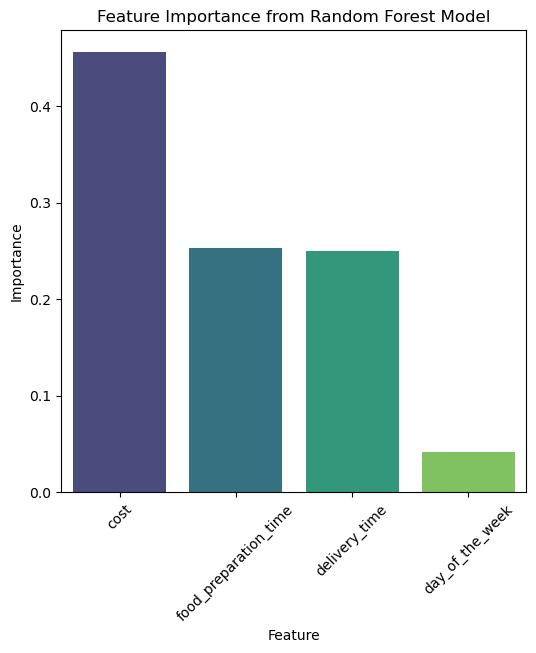

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data for feature importance
importances = [0.455745, 0.253458, 0.249510, 0.041287]
features = ['cost', 'food_preparation_time', 'delivery_time', 'day_of_the_week']

# Create a DataFrame for better plotting with seaborn
importances_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# Create a vertical bar chart
plt.figure(figsize=(6, 6))
sns.barplot(x='Feature', y='Importance', data=importances_df, palette='viridis')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest Model')
plt.xticks(rotation=45)  # Rotate feature names for better readability
plt.show()


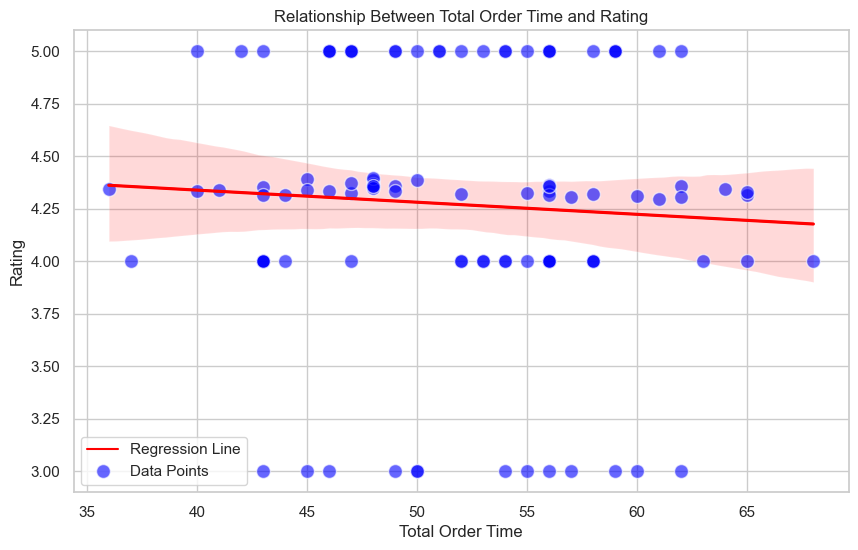

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Calculate the total order time
data['total_order_time'] = data['food_preparation_time'] + data['delivery_time']

# Sample 100 records from the dataset
sampled_data = data.sample(n=100, random_state=42)

# Fit and plot the linear regression model
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Plot the regression line without scatter points
sns.regplot(x='total_order_time', y='rating', data=sampled_data, scatter=False, line_kws={'color':'red', 'label':'Regression Line'})

# Get sorted values for a smooth line plot
sorted_order_time = np.sort(sampled_data['total_order_time'])
predicted_ratings = np.poly1d(np.polyfit(sampled_data['total_order_time'], sampled_data['rating'], 1))(sorted_order_time)

# Plot the regression line
plt.plot(sorted_order_time, predicted_ratings, color='red', label='Regression Line')

# Plot the data points with scatter
plt.scatter(sampled_data['total_order_time'], sampled_data['rating'], color='blue', alpha=0.6, edgecolor='w', s=100, label='Data Points')

# Add labels, title, and legend
plt.xlabel('Total Order Time')
plt.ylabel('Rating')
plt.title('Relationship Between Total Order Time and Rating')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
